In [2]:
import pandas as pd

wine_red = pd.read_csv("winequality-red.csv", sep=";")
wine_white = pd.read_csv("winequality-white.csv", sep=";")

# Add a column of 0 to the red wine dataset and a column of 1 to the white wine dataset
wine_red['new_column'] = 0
wine_white['new_column'] = 1

# Merge the two datasets
wine = pd.concat([wine_white, wine_red], ignore_index=True)


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  
0                 45.0                 170.0   1.0010  3.00       0.45  
1                 14.0                 132.0   0.9940  3.30       0.49  
2                 30.0                  97.0   0.9951  3.26       0.44  
3                 47.0                 186.0   0.9956  3.19       0.40  
4                 47.0                 186.0   0.9956  3.19       0.40  


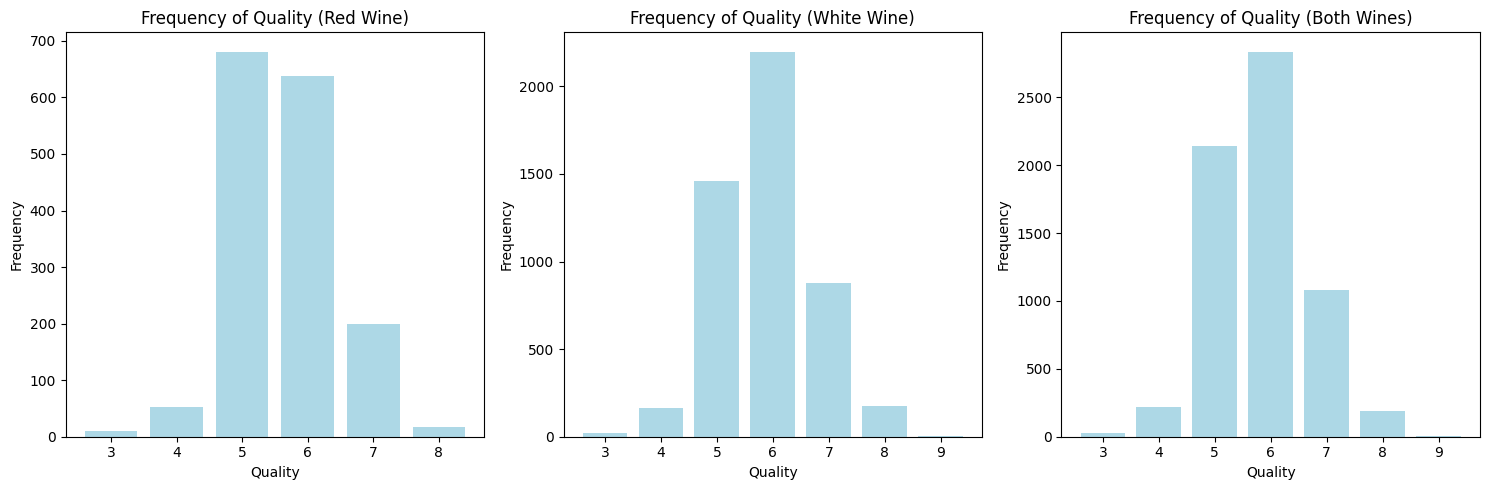

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Check the frequency of the rates for red wine and produce a bar plot
frequency_table_red = wine_red['quality'].value_counts()
percentage_red = (frequency_table_red / len(wine_red)) * 100

axes[0].bar(frequency_table_red.index, frequency_table_red, color='lightblue')
axes[0].set_title("Frequency of Quality (Red Wine)")
axes[0].set_xlabel("Quality")
axes[0].set_ylabel("Frequency")

# Check the frequency of the rates for white wine and produce a bar plot
frequency_table_white = wine_white['quality'].value_counts()
percentage_white = (frequency_table_white / len(wine_white)) * 100

axes[1].bar(frequency_table_white.index, frequency_table_white, color='lightblue')
axes[1].set_title("Frequency of Quality (White Wine)")
axes[1].set_xlabel("Quality")
axes[1].set_ylabel("Frequency")


# Check the frequency of the rates for both wines at the same time and produce a bar plot
frequency_table = wine['quality'].value_counts()
percentage = (frequency_table / len(wine)) * 100

axes[2].bar(frequency_table.index, frequency_table, color='lightblue')
axes[2].set_title("Frequency of Quality (Both Wines)")
axes[2].set_xlabel("Quality")
axes[2].set_ylabel("Frequency")

#Show the "head" of the data table
wine_overview = wine.iloc[:5, :10]
print(wine_overview)

plt.tight_layout()
plt.show()

In [6]:
import numpy as np

#Is there any statistical difference in quality between the two wines? (spoiler: no)

# Extract the quality values for the two classes
class_0_quality = wine[wine['new_column'] == 0]['quality']
class_1_quality = wine[wine['new_column'] == 1]['quality']

# Calculate the observed difference in means
observed_difference = np.abs(np.mean(class_1_quality) - np.mean(class_0_quality))

# Perform the permutational test
num_permutations = 1000
combined_data = np.concatenate((class_0_quality, class_1_quality))
permutation_differences = np.zeros(num_permutations)

for i in range(num_permutations):
    np.random.shuffle(combined_data)
    permuted_class_0 = combined_data[:len(class_0_quality)]
    permuted_class_1 = combined_data[len(class_0_quality):]
    permutation_differences[i] = np.abs(np.mean(permuted_class_1) - np.mean(permuted_class_0))

# Calculate the p-value as the proportion of permutation differences greater than or equal to the observed difference
p_value = np.sum(permutation_differences >= observed_difference) / num_permutations

# Print the observed difference and p-value
print("Observed Difference in Means:", observed_difference)
print("Permutational Test p-value:", p_value)
print(np.sum(permutation_differences >= observed_difference))

Observed Difference in Means: 0.2418868366841158
Permutational Test p-value: 0.0
0


In [ ]:
#------------------ RED WINE, PREDICT QUALITY ---------------------------------------


import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Set the seed for reproducibility
np.random.seed(123)
tf.random.set_seed(123)

# Split the dataset into training (80%) and testing (20%) sets
np.random.seed(42)
train_features, test_features, train_target, test_target = train_test_split(
    wine_red[['fixed acidity' , 'volatile acidity' , 'citric acid' , 'residual sugar' ,'chlorides'
                              , 'free sulfur dioxide' , 'density' , 'pH' , 'sulphates' , 'alcohol']],
    wine_red['quality'],
    test_size=0.2
)

# Adjust the target variable to range 0 - 5 instead of 3 - 8
train_target -= 3
test_target -= 3

# Convert the target variable to categorical
train_target = tf.keras.utils.to_categorical(train_target, num_classes=6)
test_target = tf.keras.utils.to_categorical(test_target, num_classes=6)

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(500, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(300, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(100, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(100, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(100, activation='ReLU'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(6, activation='softmax')  # Use softmax activation for classification
])

# Compile the model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(train_features.shape)
print(train_target.shape)
# Train the neural network
model.fit(train_features, train_target, epochs=200 ,batch_size = 32, verbose=1,validation_data=(test_features, test_target))

# Evaluate the model on the testing data
loss, accuracy = model.evaluate(test_features, test_target, verbose=0)
print("Accuracy:", accuracy)

(1279, 10)
(1279, 6)
Epoch 1/200
40/40 [==============================] - 10s 16ms/step - loss: 1.9411 - accuracy: 0.3253 - val_loss: 1.7216 - val_accuracy: 0.4250
Epoch 2/200
40/40 [==============================] - 0s 10ms/step - loss: 1.5555 - accuracy: 0.4730 - val_loss: 1.8607 - val_accuracy: 0.4000
Epoch 3/200
40/40 [==============================] - 0s 9ms/step - loss: 1.4113 - accuracy: 0.4988 - val_loss: 1.8364 - val_accuracy: 0.3812
Epoch 4/200
40/40 [==============================] - 0s 9ms/step - loss: 1.2942 - accuracy: 0.5324 - val_loss: 1.6803 - val_accuracy: 0.3562
Epoch 5/200
40/40 [==============================] - 0s 10ms/step - loss: 1.2110 - accuracy: 0.5387 - val_loss: 1.2649 - val_accuracy: 0.4281
Epoch 6/200
40/40 [==============================] - 0s 9ms/step - loss: 1.1425 - accuracy: 0.5481 - val_loss: 1.1332 - val_accuracy: 0.4563
Epoch 7/200
40/40 [==============================] - 0s 9ms/step - loss: 1.0875 - accuracy: 0.5520 - val_loss: 1.1447 - val_accur

In [ ]:
# "Relaxed" accuracy. Considered correct if estimated in the +-1 range (spoiler: it gets much higher)

# Get the predictions for the features
predictions = model.predict(test_features)

# Find the indexes of the highest number for each row
vector_predictions = np.argmax(predictions, axis=1) + 3
vector_real_predictions = np.argmax(test_target, axis=1) + 3

accuracy2 = (np.sum(vector_predictions == vector_real_predictions) +
             np.sum(vector_predictions == vector_real_predictions-1) +
             np.sum(vector_predictions == vector_real_predictions+1)) / len(test_target)
print("Accuracy2:", accuracy2)

10/10 [==============================] - 0s 2ms/step
Accuracy2: 0.971875


In [ ]:
#------------------ WHITE WINE, PREDICT QUALITY ---------------------------------------


import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Set the seed for reproducibility
np.random.seed(123)
tf.random.set_seed(123)

# Split the dataset into training (80%) and testing (20%) sets
np.random.seed(42)
train_features, test_features, train_target, test_target = train_test_split(
    wine_white[['fixed acidity' , 'volatile acidity' , 'citric acid' , 'residual sugar' ,'chlorides'
                              , 'free sulfur dioxide' , 'density' , 'pH' , 'sulphates' , 'alcohol']],
    wine_white['quality'],
    test_size=0.2
)
# Adjust the target variable to range from 0 - 6 instead of 3 - 9
train_target -= 3
test_target -= 3

# Convert the target variable to categorical
train_target = tf.keras.utils.to_categorical(train_target, num_classes=7)
test_target = tf.keras.utils.to_categorical(test_target, num_classes=7)

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(500, activation='LeakyReLU'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(300, activation='LeakyReLU'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(100, activation='LeakyReLU'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(100, activation='LeakyReLU'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(100, activation='LeakyReLU'),
    tf.keras.layers.Dense(7, activation='softmax')  # Use softmax activation for classification
])

# Compile the model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Train the neural network
model.fit(train_features, train_target, epochs=200,batch_size = 32, verbose=1,validation_data=(test_features, test_target))

# Evaluate the model on the testing data
loss, accuracy = model.evaluate(test_features, test_target, verbose=0)
print("Accuracy:", accuracy)


Epoch 1/200
123/123 [==============================] - 4s 7ms/step - loss: 1.4278 - accuracy: 0.4025 - val_loss: 1.3125 - val_accuracy: 0.4367
Epoch 2/200
123/123 [==============================] - 1s 5ms/step - loss: 1.3012 - accuracy: 0.4382 - val_loss: 1.2468 - val_accuracy: 0.4214
Epoch 3/200
123/123 [==============================] - 1s 5ms/step - loss: 1.2406 - accuracy: 0.4538 - val_loss: 1.2285 - val_accuracy: 0.4633
Epoch 4/200
123/123 [==============================] - 1s 5ms/step - loss: 1.2129 - accuracy: 0.4671 - val_loss: 1.1856 - val_accuracy: 0.4622
Epoch 5/200
123/123 [==============================] - 1s 5ms/step - loss: 1.2020 - accuracy: 0.4719 - val_loss: 1.1568 - val_accuracy: 0.4541
Epoch 6/200
123/123 [==============================] - 1s 6ms/step - loss: 1.1900 - accuracy: 0.4745 - val_loss: 1.1482 - val_accuracy: 0.4847
Epoch 7/200
123/123 [==============================] - 1s 6ms/step - loss: 1.1729 - accuracy: 0.4758 - val_loss: 1.1280 - val_accuracy: 0.4969

In [ ]:
# "Relaxed" accuracy. Considered correct if estimated in the +-1 range (spoiler: it gets much higher)


# Get the predictions for the features
predictions = model.predict(test_features)

# Find the indexes of the highest number for each row
vector_predictions = np.argmax(predictions, axis=1) + 3
vector_real_predictions = np.argmax(test_target, axis=1) + 3

accuracy2 = (np.sum(vector_predictions == vector_real_predictions) +
             np.sum(vector_predictions == vector_real_predictions-1) +
             np.sum(vector_predictions == vector_real_predictions+1)) / len(test_target)
print("Accuracy2:", accuracy2)

#Accuracy è molto più elevata così

31/31 [==============================] - 0s 2ms/step
Accuracy2: 0.9642857142857143


In [ ]:
#------------------ WINE TOGETHER, PREDICT QUALITY ---------------------------------------


import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Set the seed for reproducibility
np.random.seed(123)
tf.random.set_seed(123)

# Split the dataset into training (80%) and testing (20%) sets
np.random.seed(42)
train_features, test_features, train_target, test_target = train_test_split(
    wine[['fixed acidity' , 'volatile acidity' , 'citric acid' , 'residual sugar' ,'chlorides'
                              , 'free sulfur dioxide' , 'density' , 'pH' , 'sulphates' , 'alcohol']],
    wine['quality'],
    test_size=0.2
)
# Adjust the target variable to range from 0 to 6
train_target -= 3
test_target -= 3

# Convert the target variable to categorical
train_target = tf.keras.utils.to_categorical(train_target, num_classes=7)
test_target = tf.keras.utils.to_categorical(test_target, num_classes=7)

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(500, activation='LeakyReLU'),
    tf.keras.layers.Dropout(0.2),  # Dropout layer with a dropout rate of 0.2 (adjust as needed)
    tf.keras.layers.Dense(300, activation='LeakyReLU'),
    tf.keras.layers.Dropout(0.2),  # Dropout layer with a dropout rate of 0.2 (adjust as needed)
    tf.keras.layers.Dense(100, activation='LeakyReLU'),
    tf.keras.layers.Dropout(0.2),  # Dropout layer with a dropout rate of 0.2 (adjust as needed)
    tf.keras.layers.Dense(100, activation='LeakyReLU'),
    tf.keras.layers.Dropout(0.2),  # Dropout layer with a dropout rate of 0.2 (adjust as needed)
    tf.keras.layers.Dense(100, activation='LeakyReLU'),
    tf.keras.layers.Dense(7, activation='softmax')  # Use softmax activation for classification
])

# Compile the model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(train_features.shape)
print(train_target.shape)
# Train the neural network
model.fit(train_features, train_target, epochs= 200, batch_size = 32, verbose=1,validation_data=(test_features, test_target))

# Evaluate the model on the testing data
loss, accuracy = model.evaluate(test_features, test_target, verbose=0)
print("Accuracy:", accuracy)


(5197, 10)
(5197, 7)
Epoch 1/200
163/163 [==============================] - 11s 6ms/step - loss: 1.4181 - accuracy: 0.4097 - val_loss: 1.2657 - val_accuracy: 0.4462
Epoch 2/200
163/163 [==============================] - 1s 5ms/step - loss: 1.3056 - accuracy: 0.4199 - val_loss: 1.1948 - val_accuracy: 0.4477
Epoch 3/200
163/163 [==============================] - 1s 6ms/step - loss: 1.2582 - accuracy: 0.4404 - val_loss: 1.1789 - val_accuracy: 0.4677
Epoch 4/200
163/163 [==============================] - 1s 6ms/step - loss: 1.2344 - accuracy: 0.4501 - val_loss: 1.1240 - val_accuracy: 0.4846
Epoch 5/200
163/163 [==============================] - 1s 5ms/step - loss: 1.1952 - accuracy: 0.4660 - val_loss: 1.1196 - val_accuracy: 0.4908
Epoch 6/200
163/163 [==============================] - 1s 5ms/step - loss: 1.1812 - accuracy: 0.4834 - val_loss: 1.0978 - val_accuracy: 0.5069
Epoch 7/200
163/163 [==============================] - 1s 4ms/step - loss: 1.1833 - accuracy: 0.4745 - val_loss: 1.1108 

In [ ]:
# "Relaxed" accuracy. Considered correct if estimated in the +-1 range (spoiler: it gets much higher)


# Get the predictions for the features
from sklearn.metrics import mean_absolute_error

predictions = model.predict(test_features)

# Find the indexes of the highest number for each row
vector_predictions = np.argmax(predictions, axis=1) + 3
vector_real_predictions = np.argmax(test_target, axis=1) + 3

# Print the vector of indexes
print(vector_predictions)
print(vector_real_predictions)

accuracy2 = (np.sum(vector_predictions == vector_real_predictions) +
             np.sum(vector_predictions == vector_real_predictions-1) +
             np.sum(vector_predictions == vector_real_predictions+1)) / len(test_target)
print("Accuracy2:", accuracy2)

# How far off am I on average?
mae = mean_absolute_error(vector_real_predictions, vector_predictions)
print("Mean Absolute Error:", mae)

41/41 [==============================] - 0s 3ms/step
[6 6 6 ... 5 6 6]
[7 7 6 ... 6 6 6]
Accuracy2: 0.9676923076923077
0.46923076923076923
Mean Absolute Error: 0.46923076923076923


In [ ]:
#------------------ WINE TOGETHER, PREDICT IF RED OR WHITE ---------------------------------------


import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# Set the seed for reproducibility
np.random.seed(123)
tf.random.set_seed(123)

#Naive classifier
naive_accuracy = wine_white.shape[0] / (wine_white.shape[0] + wine_red.shape[0])
print("Naive classifier accuracy: ", naive_accuracy)

# Split the dataset into training (80%) and testing (20%) sets
np.random.seed(42)
train_features, test_features, train_target, test_target = train_test_split(
    wine[[ 'fixed acidity' , 'volatile acidity' , 'citric acid' , 'residual sugar' ,'chlorides'
                              , 'free sulfur dioxide' , 'density' , 'pH' , 'sulphates' , 'alcohol','quality']],
    wine['new_column'],
    test_size=0.2
)

# Convert the target variable to categorical
train_target = tf.keras.utils.to_categorical(train_target, num_classes=2)
test_target = tf.keras.utils.to_categorical(test_target, num_classes=2)

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='ELU'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(50, activation='ELU'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(30, activation='ELU'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the neural network
model.fit(train_features, train_target, epochs=1000, batch_size = 32, verbose=1, validation_data=(test_features, test_target))

# Evaluate the model on the testing data
loss, accuracy = model.evaluate(test_features, test_target, verbose=0)
print("Accuracy:", accuracy)

# Convert the categorical data back to original form
original_test_target = np.argmax(test_target, axis=1)

# Compute the ROC-AUC score
probabilities = model.predict(test_features)
roc_auc = roc_auc_score(original_test_target, probabilities[:, 1])
print("ROC-AUC Score:", roc_auc)




# Generate confusion matrix
cm = confusion_matrix(test_target, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Naive classifier accuracy:  0.7538864091118977
Epoch 1/1000
163/163 [==============================] - 3s 6ms/step - loss: 0.5354 - accuracy: 0.8030 - val_loss: 0.3293 - val_accuracy: 0.8600
Epoch 2/1000
163/163 [==============================] - 1s 5ms/step - loss: 0.3403 - accuracy: 0.8580 - val_loss: 0.2805 - val_accuracy: 0.8892
Epoch 3/1000
163/163 [==============================] - 1s 5ms/step - loss: 0.2955 - accuracy: 0.8757 - val_loss: 0.2346 - val_accuracy: 0.9046
Epoch 4/1000
163/163 [==============================] - 1s 5ms/step - loss: 0.2566 - accuracy: 0.8978 - val_loss: 0.1997 - val_accuracy: 0.9238
Epoch 5/1000
163/163 [==============================] - 1s 5ms/step - loss: 0.2149 - accuracy: 0.9128 - val_loss: 0.1781 - val_accuracy: 0.9331
Epoch 6/1000
163/163 [==============================] - 1s 5ms/step - loss: 0.2046 - accuracy: 0.9232 - val_loss: 0.1615 - val_accuracy: 0.9415
Epoch 7/1000
163/163 [==============================] - 1s 5ms/step - loss: 0.1765 - accu

ValueError: ignored

Accuracy: 0.9807692307692307
Feature Importances:
                Feature  Importance
4             chlorides    0.641482
3        residual sugar    0.091012
6               density    0.075141
0         fixed acidity    0.040186
9               alcohol    0.029673
2           citric acid    0.029440
8             sulphates    0.025606
7                    pH    0.023651
1      volatile acidity    0.022031
5   free sulfur dioxide    0.015846
10              quality    0.005932


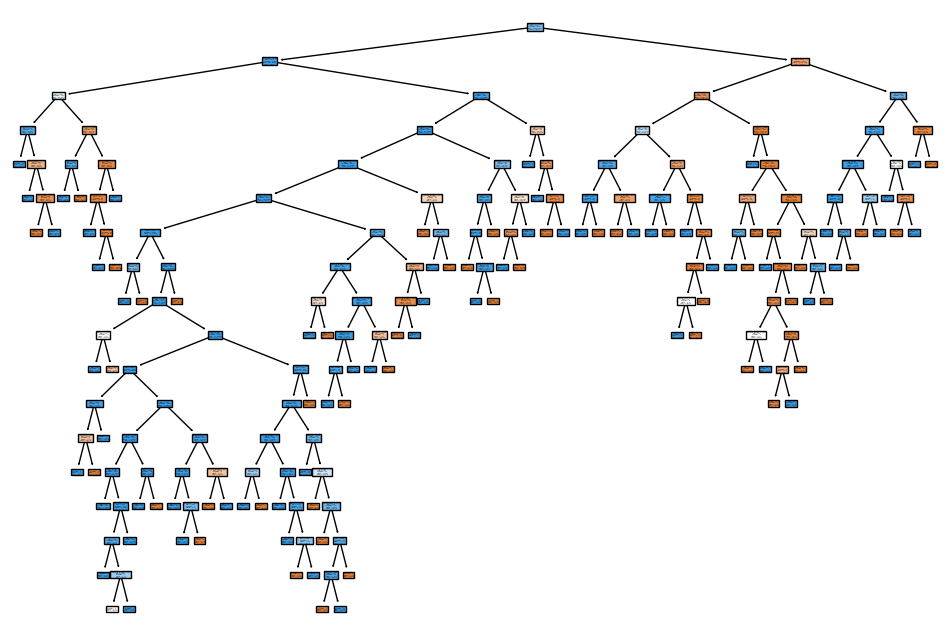

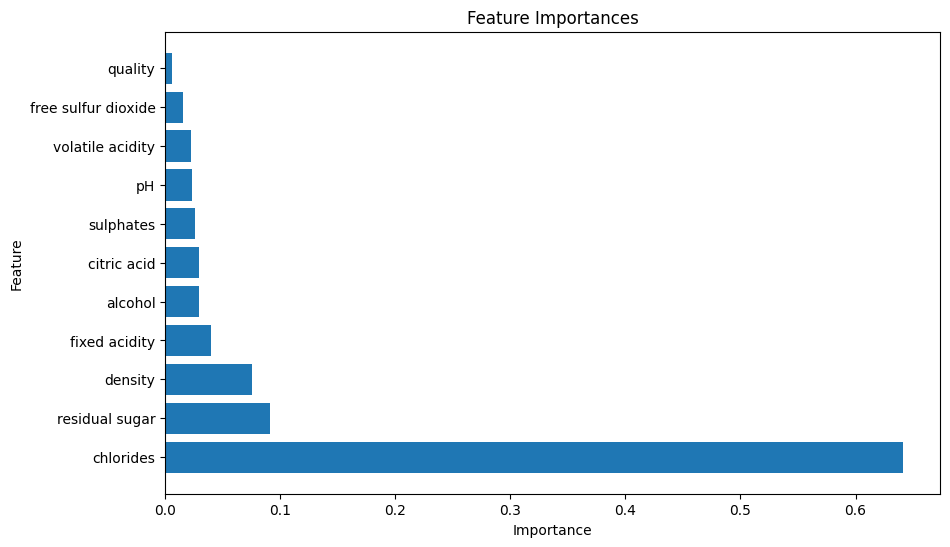

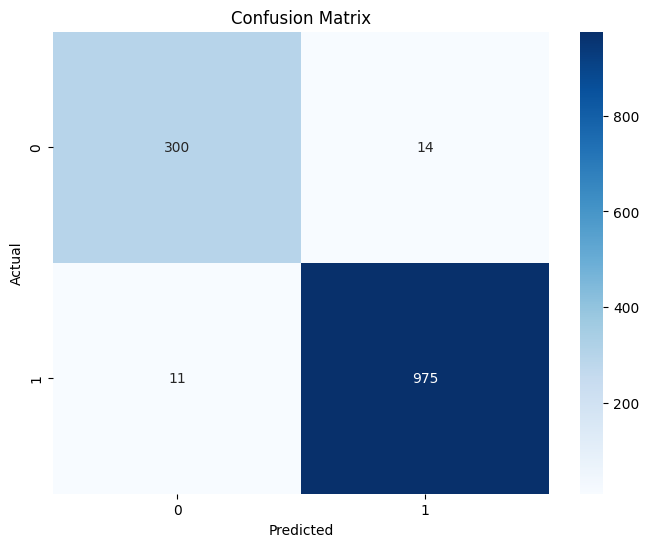

ROC-AUC Score: 0.9721289130631386


In [ ]:
#------------- Let's check the accuracy I can reach with a decision tree and let's do features selection ---------------

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Split the dataset into training (80%) and testing (20%) sets
np.random.seed(42)
train_features, test_features, train_target, test_target = train_test_split(
    wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
           'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']],
    wine['new_column'],
    test_size=0.2
)

# Create an instance of DecisionTreeClassifier
model = DecisionTreeClassifier()

# Train the decision tree model
model.fit(train_features, train_target)

# Make predictions on the testing data
predictions = model.predict(test_features)

# Evaluate the model
accuracy = np.mean(predictions == test_target)
print("Accuracy:", accuracy)


# Get feature importances
importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame({"Feature": train_features.columns, "Importance": importances})
feature_importances.sort_values(by="Importance", ascending=False, inplace=True)

# Print feature importances
print("Feature Importances:")
print(feature_importances)


import matplotlib.pyplot as plt
from sklearn import tree

# Plot the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(model, feature_names=train_features.columns, class_names=["Class 0", "Class 1"], filled=True)
plt.show()


# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances["Feature"], feature_importances["Importance"])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances")
plt.show()

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(test_target, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



from sklearn.metrics import roc_auc_score

# Calculate the predicted probabilities for the positive class
probabilities = model.predict_proba(test_features)[:, 1]

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(test_target, probabilities)
print("ROC-AUC Score:", roc_auc)

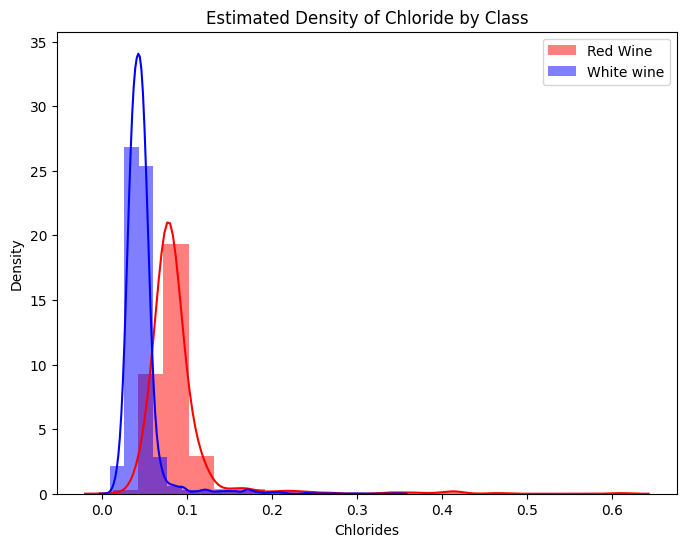

In [ ]:
#--------------------- Let's plot the empirical distribution of 'chlorides' to see if it is significantly different in the two classes, as the decision tree suggests

import matplotlib.pyplot as plt
import seaborn as sns

# Subset the dataset based on class labels
class_0_data = wine[wine['new_column'] == 0]
class_1_data = wine[wine['new_column'] == 1]

# Extract the "chlorides" values for each class
chloride_class_0 = class_0_data['chlorides']
chloride_class_1 = class_1_data['chlorides']

# Plot the empirical distribution for each class
plt.figure(figsize=(8, 6))

# Plot the KDE plot
sns.kdeplot(chloride_class_0, color='red')
sns.kdeplot(chloride_class_1, color='blue')
plt.hist(chloride_class_0, density = True, bins=20, alpha=0.5, color='red', label='Red Wine')
plt.hist(chloride_class_1, density = True, bins=20, alpha=0.5, color='blue', label='White wine')
plt.xlabel('Chlorides')
plt.ylabel('Density')
plt.title('Estimated Density of Chloride by Class')
plt.legend()
plt.show()

In [ ]:
#--------------------- I perform a non-parametric test on the mean of 'chlorides' to check if there is significant difference

#   H0:    mean_chlorides_red_wine == mean_chlorides_white_wine    vs    #   H1:    mean_chlorides_red_wine != mean_chlorides_white_wine

import scipy.stats as stats

# Perform Mann-Whitney U test:
statistic, p_value = stats.mannwhitneyu(chloride_class_0, chloride_class_1, alternative='two-sided')

# Print the test result
print("Mann-Whitney U test")
print("Test Statistic:", statistic)
print("p-value:", p_value)



#p-value = 0. I reject H0.
#We conclude 'chlorides' is a good discriminant between red and white wine

Mann-Whitney U test
Test Statistic: 7407015.5
p-value: 0.0
